Step 1: x=1.00, f=0.67, i=0.38, C~=0.66, C=0.25, o=0.57, h=0.14
Step 2: x=-0.50, f=0.42, i=0.57, C~=-0.32, C=-0.07, o=0.45, h=-0.03
Step 3: x=0.30, f=0.55, i=0.46, C~=0.22, C=0.06, o=0.53, h=0.03


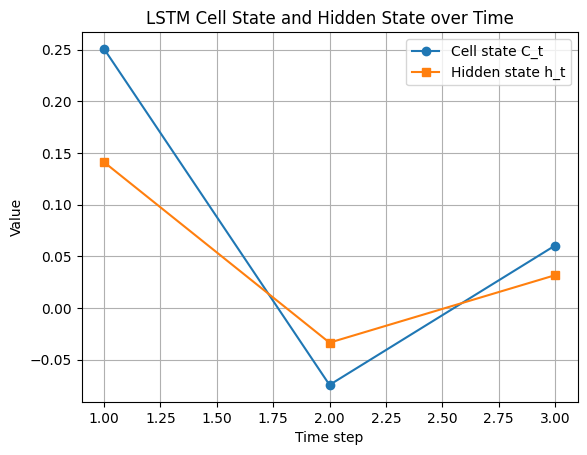

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 활성화 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 입력 시퀀스
x_seq = [1.0, -0.5, 0.3]

# 임의의 가중치와 편향 (시각화를 위해 고정)
Wf, Wi, Wo, Wc = 0.7, -0.5, 0.3, 0.8
Uf, Ui, Uo, Uc = 0.2, 0.1, -0.3, 0.5
bf, bi, bo, bc = 0.0, 0.0, 0.0, 0.0

# 초기 상태
h, C = 0.0, 0.0

history = []

for t, x in enumerate(x_seq, 1):
    f = sigmoid(Wf * x + Uf * h + bf)     # forget gate
    i = sigmoid(Wi * x + Ui * h + bi)     # input gate
    o = sigmoid(Wo * x + Uo * h + bo)     # output gate
    C_tilde = np.tanh(Wc * x + Uc * h + bc)  # candidate cell state
    
    C = f * C + i * C_tilde  # new cell state
    h = o * np.tanh(C)       # new hidden state
    
    history.append((t, x, f, i, C_tilde, C, o, h))

# 결과 출력
for step in history:
    t, x, f, i, C_tilde, C, o, h = step
    print(f"Step {t}: x={x:.2f}, f={f:.2f}, i={i:.2f}, C~={C_tilde:.2f}, C={C:.2f}, o={o:.2f}, h={h:.2f}")

# 시각화
steps = [s[0] for s in history]
C_values = [s[5] for s in history]
h_values = [s[7] for s in history]

plt.plot(steps, C_values, marker="o", label="Cell state C_t")
plt.plot(steps, h_values, marker="s", label="Hidden state h_t")
plt.xlabel("Time step")
plt.ylabel("Value")
plt.title("LSTM Cell State and Hidden State over Time")
plt.legend()
plt.grid(True)
plt.show()


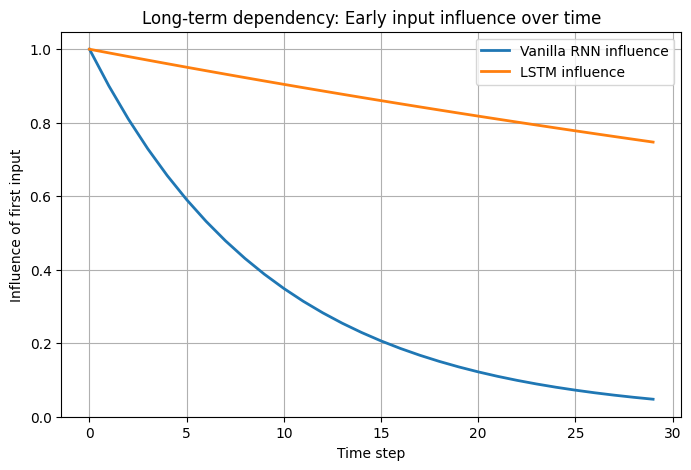

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 시퀀스 길이
T = 30

# RNN에서의 영향력 감소 (가중치가 0.9라 가정)
influence_rnn = [0.9**t for t in range(T)]

# LSTM에서의 영향력 감소 (가중치가 0.99라 가정 → 천천히 감소)
influence_lstm = [0.99**t for t in range(T)]

plt.figure(figsize=(8,5))
plt.plot(influence_rnn, label="Vanilla RNN influence", linewidth=2)
plt.plot(influence_lstm, label="LSTM influence", linewidth=2)
plt.xlabel("Time step")
plt.ylabel("Influence of first input")
plt.title("Long-term dependency: Early input influence over time")
plt.legend()
plt.grid(True)
plt.show()


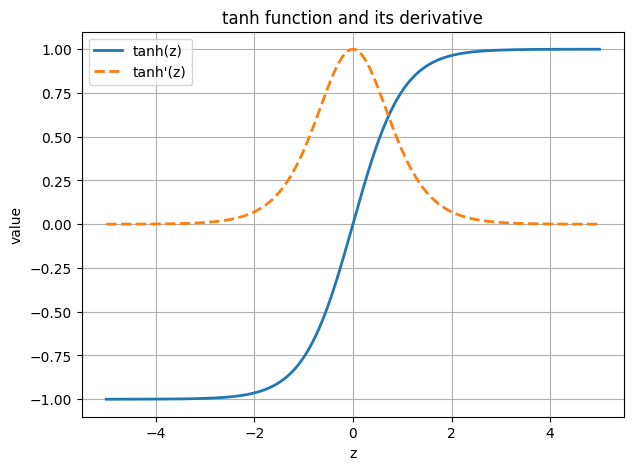

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# x 값 범위
x = np.linspace(-5, 5, 400)

# tanh 함수와 미분 정의
tanh = np.tanh
tanh_deriv = lambda z: 1 - np.tanh(z)**2

# 함수 값 계산
y_tanh = tanh(x)
y_tanh_d = tanh_deriv(x)

# 그래프 그리기
plt.figure(figsize=(7,5))
plt.plot(x, y_tanh, label="tanh(z)", linewidth=2)
plt.plot(x, y_tanh_d, label="tanh'(z)", linestyle="--", linewidth=2)
plt.title("tanh function and its derivative")
plt.xlabel("z")
plt.ylabel("value")
plt.legend()
plt.grid(True)
plt.show()
